In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch,VerticalPitch
import warnings

In [2]:
DATA = pd.read_csv(r"C:/shoot/xgresult.csv" , encoding = "CP949" , sep=",")

In [3]:
DATA.head()

assist  asx  asy  fin  hed  inv  nom  res         x         y     xG
0       0  0.0  0.0    0    0   18    1    0  0.810456  0.401598  0.093
1       0  0.0  0.0    0    1    4    0    0  0.876681  0.497257  0.018
2       0  0.0  0.0    0    0   12    1    0  0.735775  0.395596  0.042
3       0  0.0  0.0    0    0    2    1    1  0.870968  0.551670  0.105
4       0  0.0  0.0    0    1   11    0    0  0.924941  0.417424  0.005

In [5]:
def shotsmap(data):
    goals=data.loc[data['res']==1]
    nogoals=data.loc[data['res']==0]
    return goals,nogoals

In [6]:
from mplsoccer import Pitch, VerticalPitch
goals,nogoals = shotsmap(DATA)

Text(0.5, 0.5, 'Expected Goal HeatMap For All No Goals')

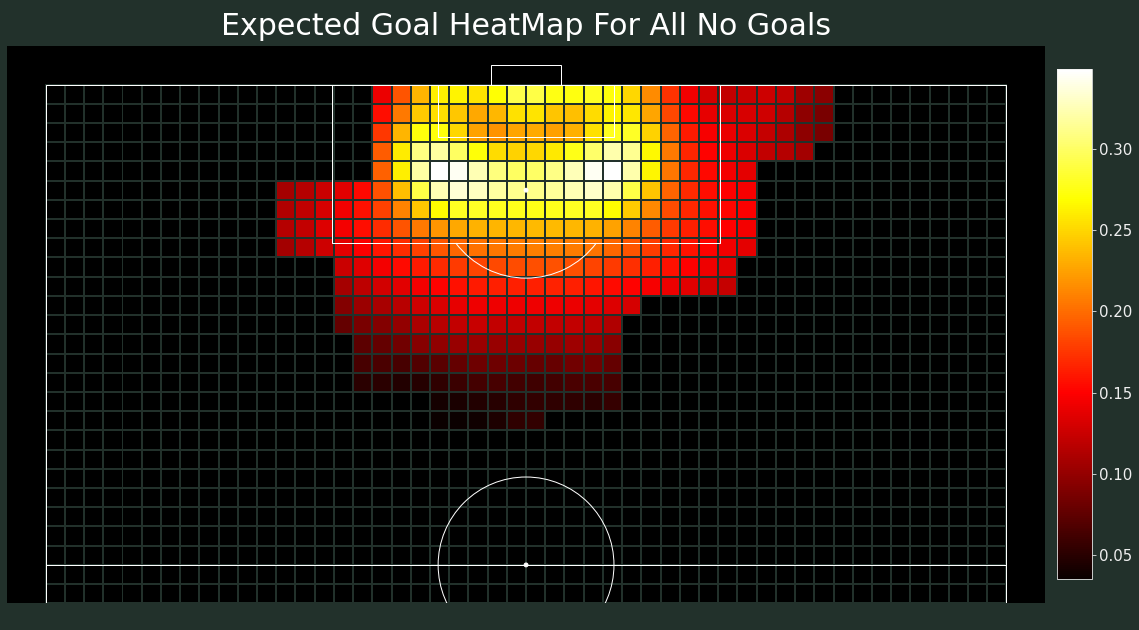

In [8]:
from scipy.ndimage import gaussian_filter

pitch = VerticalPitch(pitch_type='custom',
                       half=True,line_zorder=2, goal_type='box', line_color='white', pitch_color='black', linewidth=1,pitch_length=100, pitch_width=100, constrained_layout=True
                      )

fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      axis=False,
                      grid_height=0.86)
fig.set_facecolor('#22312b')

# plot heatmap
bin_statistic = pitch.bin_statistic(nogoals.x*100, nogoals.y*100, values=nogoals.xG ,statistic='mean', bins=(50, 50))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')

ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(15)
    
axs['title'].text(0.5, 0.5, "Expected Goal HeatMap For All No Goals", color='white',
                  va='center', ha='center',
                  fontsize=30)

Text(0.5, 0.5, 'Expected Goal HeatMap For All Goals')

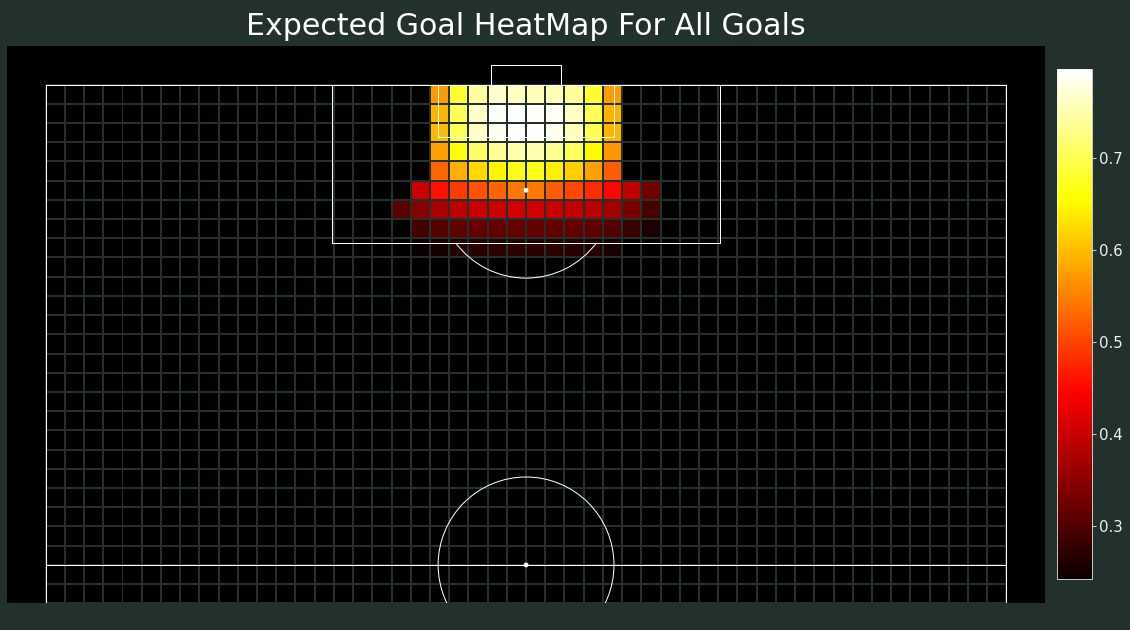

In [9]:
pitch = VerticalPitch(pitch_type='custom',
                       half=True,line_zorder=2, goal_type='box', line_color='white', pitch_color='black', linewidth=1,pitch_length=100, pitch_width=100, constrained_layout=True
                      )

fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      axis=False,
                      grid_height=0.86)
fig.set_facecolor('#22312b')

# plot heatmap
bin_statistic = pitch.bin_statistic(goals.x*100, goals.y*100, values=goals.xG ,statistic='mean', bins=(50, 50))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')

ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(15)
    
axs['title'].text(0.5, 0.5, "Expected Goal HeatMap For All Goals", color='white',
                  va='center', ha='center',
                  fontsize=30)

##### 슈팅 종류별 기대득점 1

In [10]:
headers_goal=DATA.loc[(DATA['hed']==1)&(DATA['res']==1)]
headers_nogoal=DATA.loc[(DATA['hed']==1)&(DATA['res']==0)]
finesses_goal=DATA.loc[(DATA['fin']==1)&(DATA['res']==1)]
finesses_nogoal=DATA.loc[(DATA['fin']==1)&(DATA['res']==0)]
normals_goal=DATA.loc[(DATA['nom']==1)&(DATA['res']==1)]
normals_nogoal=DATA.loc[(DATA['nom']==1)&(DATA['res']==0)]

Text(50, 150, 'Xg Scatter For Header Goals')

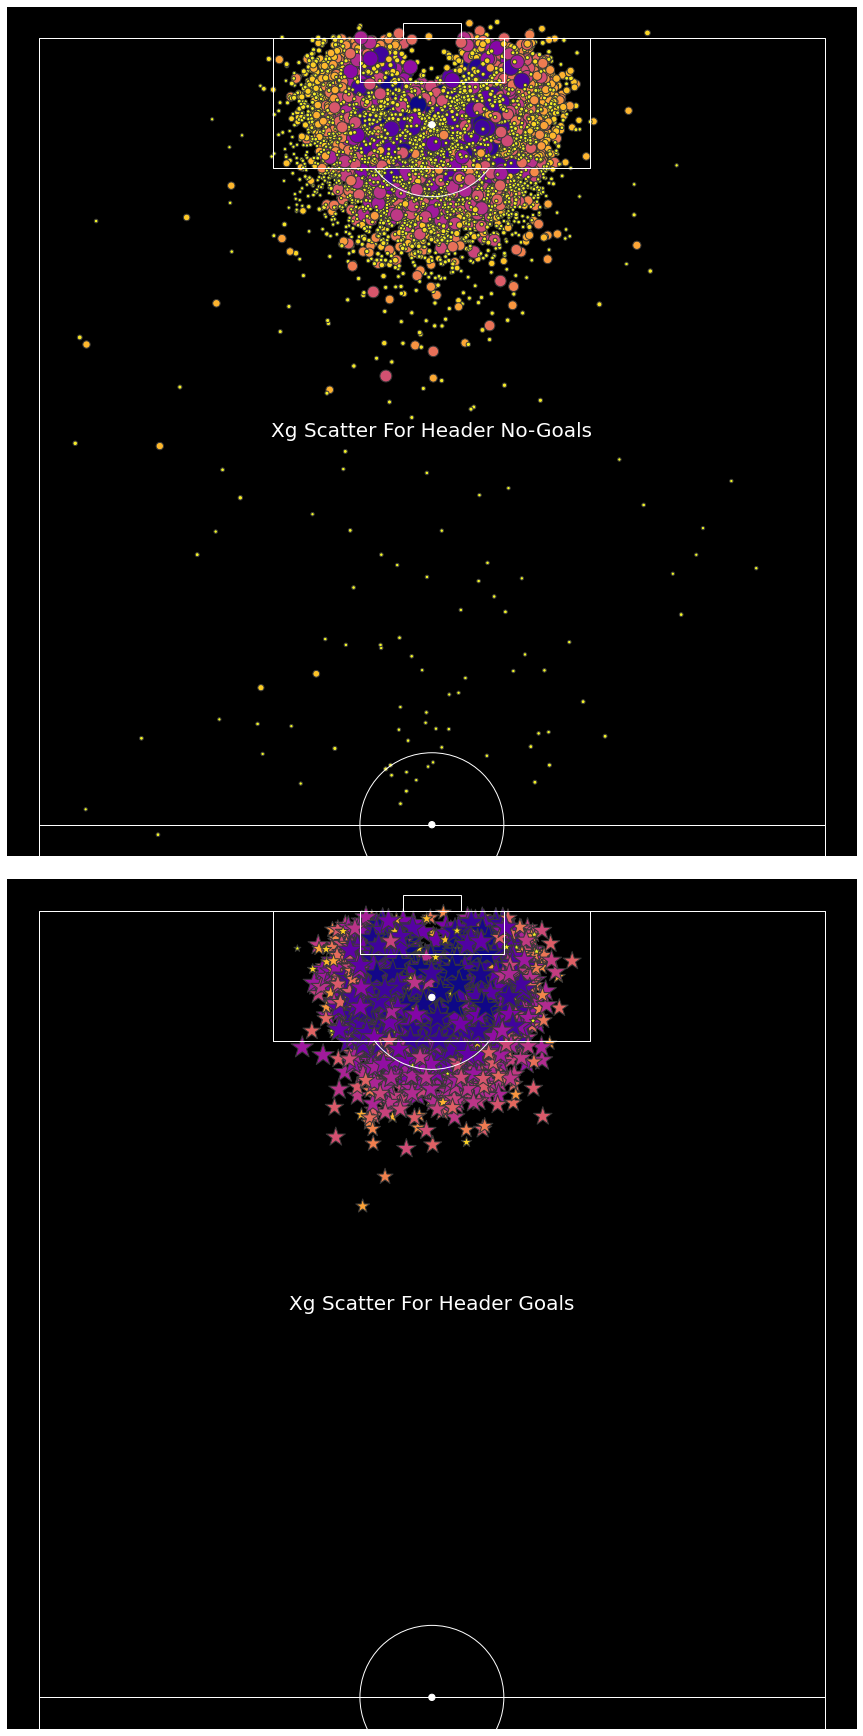

In [11]:

pitch = VerticalPitch(pitch_type='custom',
                       half=True,line_zorder=2, goal_type='box', line_color='white', pitch_color='black', linewidth=1,pitch_length=200, pitch_width=100, constrained_layout=True
                      )
fig, axs = pitch.draw(figsize=(48,24)
                      ,nrows=2, ncols=1, tight_layout=False, constrained_layout=True)

sc2 = pitch.scatter(headers_nogoal.x*200, headers_nogoal.y*100, s=(headers_nogoal.xG*300)+10
                ,cmap='plasma_r',  
                   edgecolors='#383838',  
                   c=headers_nogoal.xG, 
                   marker='o',
                   ax=axs[0])
sc = pitch.scatter(headers_goal.x*200, headers_goal.y*100, s=(headers_goal.xG*800)+50
                ,cmap='plasma_r',  
                   edgecolors='#383838',  
                   c=headers_goal.xG,  
                   marker='*',
                   ax=axs[1])
axs[0].text(x=50, y=150, s='Xg Scatter For Header No-Goals',
              size=20,
              color='white',
              va='center', ha='center')
axs[1].text(x=50, y=150, s='Xg Scatter For Header Goals',
              size=20,
              color='white',
              va='center', ha='center')



Text(50, 120, 'Xg Scatter For Finess Goals')

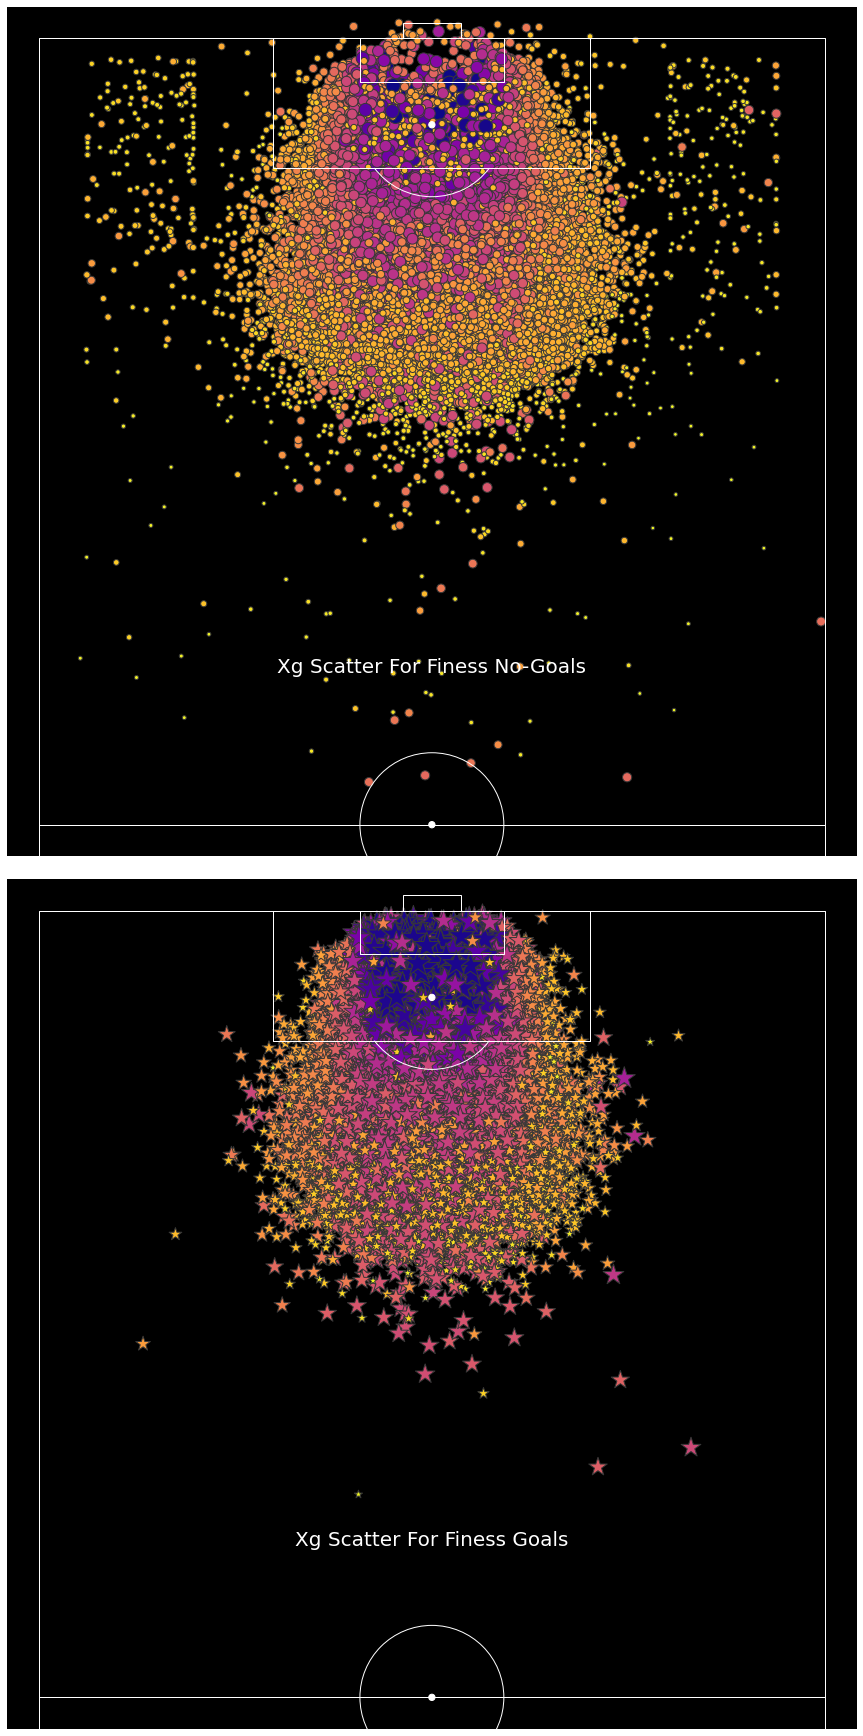

In [12]:

pitch = VerticalPitch(pitch_type='custom',
                       half=True,line_zorder=2, goal_type='box', line_color='white', pitch_color='black', linewidth=1,pitch_length=200, pitch_width=100, constrained_layout=True
                      )
fig, axs = pitch.draw(figsize=(48,24)
                      ,nrows=2, ncols=1, tight_layout=False, constrained_layout=True)

sc2 = pitch.scatter(finesses_nogoal.x*200, finesses_nogoal.y*100, s=(finesses_nogoal.xG*200)+10
                ,cmap='plasma_r', 
                   edgecolors='#383838',  
                   c=finesses_nogoal.xG,  
                   marker='o',
                   ax=axs[0])
sc = pitch.scatter(finesses_goal.x*200, finesses_goal.y*100, s=(finesses_goal.xG*800)+30
                ,cmap='plasma_r', 
                   edgecolors='#383838', 
                   c=finesses_goal.xG,  
                   marker='*',
                   ax=axs[1])
axs[0].text(x=50, y=120, s='Xg Scatter For Finess No-Goals',
              size=20,
              color='white',
              va='center', ha='center')
axs[1].text(x=50, y=120, s='Xg Scatter For Finess Goals',
              size=20,
              color='white',
              va='center', ha='center')



Text(50, 120, 'Xg Scatter For Normal Goals')

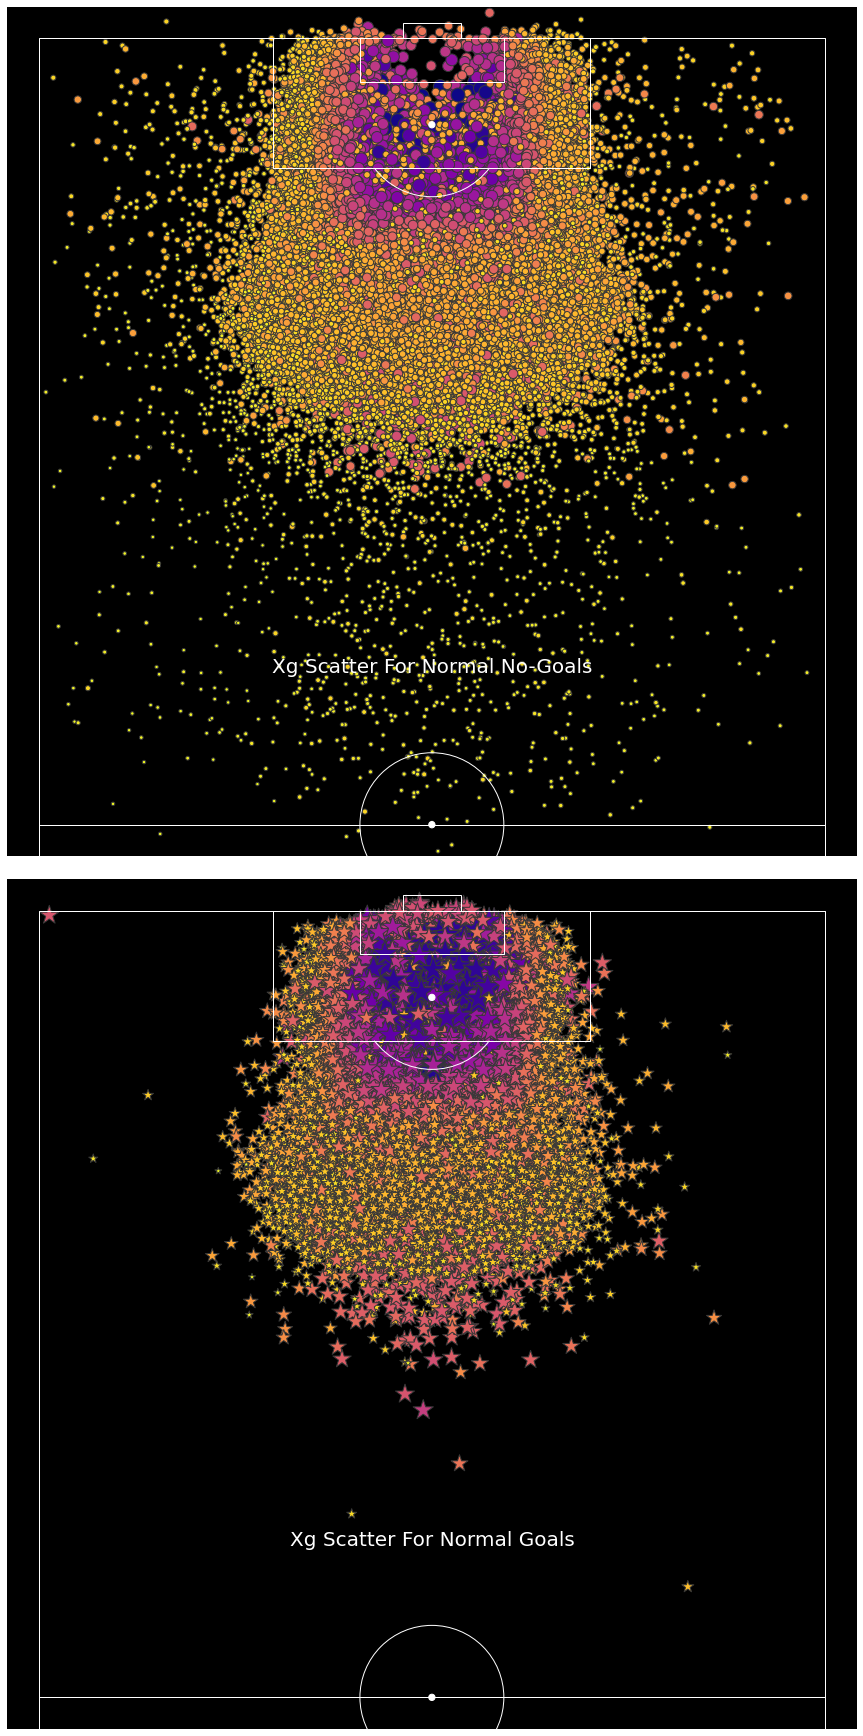

In [13]:

pitch = VerticalPitch(pitch_type='custom',
                       half=True,line_zorder=2, goal_type='box', line_color='white', pitch_color='black', linewidth=1,pitch_length=200, pitch_width=100, constrained_layout=True
                      )
fig, axs = pitch.draw(figsize=(48,24)
                      ,nrows=2, ncols=1, tight_layout=False, constrained_layout=True)

sc2 = pitch.scatter(normals_nogoal.x*200, normals_nogoal.y*100, s=(normals_nogoal.xG*200)+10
                ,cmap='plasma_r', 
                   edgecolors='#383838',  
                   c=normals_nogoal.xG, 
                   marker='o',
                   ax=axs[0])
sc = pitch.scatter(normals_goal.x*200, normals_goal.y*100, s=(normals_goal.xG*800)+30
                ,cmap='plasma_r',  
                   edgecolors='#383838', 
                   c=normals_goal.xG,  
                   marker='*',
                   ax=axs[1])
axs[0].text(x=50, y=120, s='Xg Scatter For Normal No-Goals',
              size=20,
              color='white',
              va='center', ha='center')
axs[1].text(x=50, y=120, s='Xg Scatter For Normal Goals',
              size=20,
              color='white',
              va='center', ha='center')



##### 슈팅 종류별 기대득점2 - 기대득점이 0.4 이상일 때의 슈팅 위치

득점 여부와 관계없이 슈팅 종류별 기대득점 수치가 0.4 이상일 때의 x,y 산점도를 살펴보았다.

헤더슈팅의 경우 당연하겠지만 득점이 어느정도 기대되는 슈팅들은 패널티 박스 안쪽에서도 안쪽 부근으로 형성되어있다.
하지만 골대와 아주 가까운 지점에서는 오히려 득점을 기대하기 어렵다는 것을 나타내고 있다.
이는 오히려 골키퍼와 가까운 지점에서는 헤더 슈팅들이 거의 다 선방당하거나 골문 밖을 벗어난다는 것을 말해줄 수 있지만

'Xg Scatter For Header Goals' 산점도를 통해 골키퍼로 인해 해당지점에서의 슈팅 자체가 별로 안나왔을 것이라고도 해석할 수 있을 것 같다.

피네스 슈팅의 경우 골문과 매우 근접한 위치에서 상당한 정확도를 보이고 있고, 
좋은 각도 (y축이 0.5와 가까울 때)에서 시도할 때 득점이 될 확률이 높은 것을 볼 수 있다.

일반 슈팅의 경우 패널티 박스 안에서 피네스 슈팅과 비교했을 때 넓은 각도(y축)에서도 득점 확률이 높은 슈팅을 만들어냈다.
실제 게임에서도 각이 좋지 않을 경우 강하게 꺾어차는 일반 슈팅이 피네스 슈팅(감차)보다 유효했던 점이 반영된 것 같다.
일반 슈팅의 경우 패널티박스를 살짝 이격한 중앙 부분에서 기대득점이 높은 슈팅을 만든 것으로 보여지는데 
직접 프리킥, 코너킥 리바운드 공 중거리 슈팅, 수비가 붙기(공을 가진 선수에게 직접적으로 블로킹 할 수 있는 거리에 도달하기 전) 전 공격상황에서의 중거리 슈팅 등으로 인한 결과가 아닐까 판단된다.


In [14]:
highXg_header = DATA.loc[((DATA['hed']==1)&(DATA['xG']>=0.4))]
highXg_normal = DATA.loc[((DATA['nom']==1)&(DATA['xG']>=0.4))]
highXg_finess = DATA.loc[((DATA['fin']==1)&(DATA['xG']>=0.4))]

Text(50, 50, 'High XG In Normal Shooting')

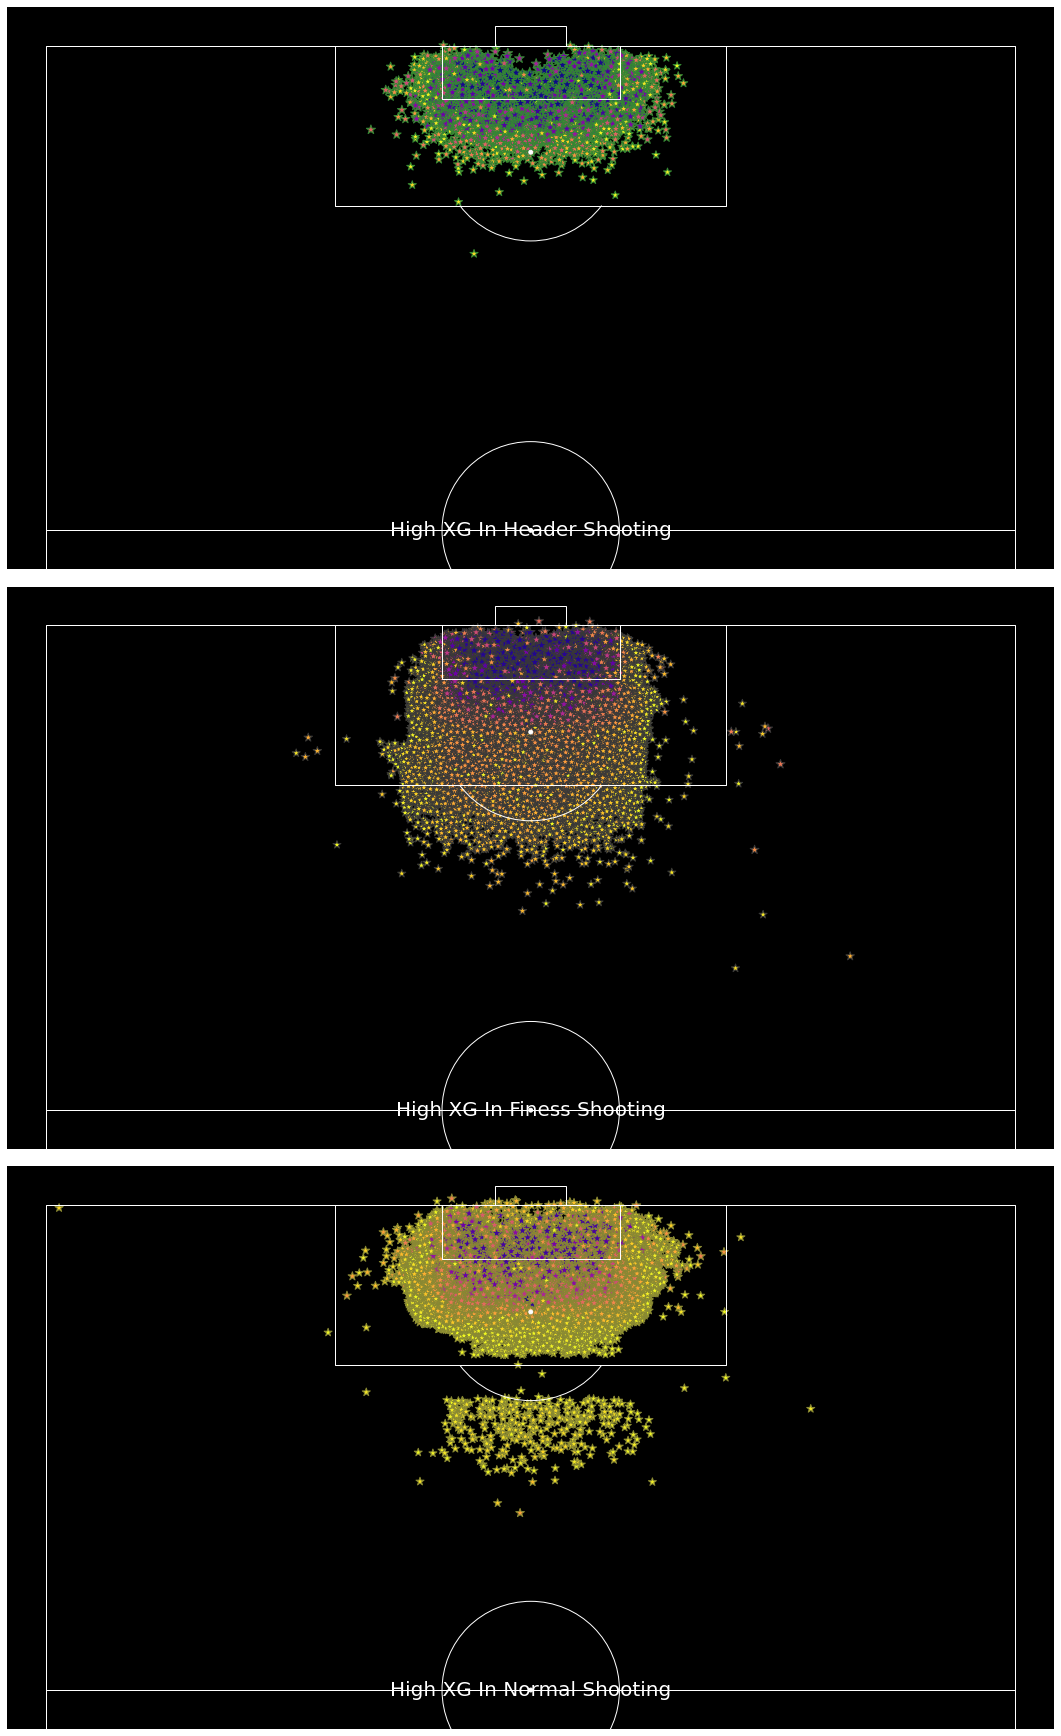

In [15]:

pitch = VerticalPitch(pitch_type='custom',
                       half=True,line_zorder=2, goal_type='box', line_color='white', pitch_color='black', linewidth=1,pitch_length=100, pitch_width=100, constrained_layout=True
                      )
fig, axs = pitch.draw(figsize=(24,24)
                      ,nrows=3, ncols=1, tight_layout=False, constrained_layout=True)


heads = pitch.scatter(highXg_header.x*100, highXg_header.y*100, s=(highXg_header.xG*100)+30
                ,cmap='plasma_r', 
                   edgecolors='#338833',  
                   c=highXg_header.xG, 
                   marker='*',
                   ax=axs[0])

fins = pitch.scatter(highXg_finess.x*100, highXg_finess.y*100, s=(highXg_finess.xG*100)+30
                ,cmap='plasma_r',  
                   edgecolors='#383838',
                   marker='*',
                   c=highXg_finess.xG,
                   ax=axs[1])
noms = pitch.scatter(highXg_normal.x*100, highXg_normal.y*100, s=(highXg_normal.xG*100)+30
                ,cmap='plasma_r', 
                   edgecolors='#888833',  
                   c=highXg_normal.xG, 
                   marker='*',  
                   ax=axs[2])

axs[0].text(x=50, y=50, s='High XG In Header Shooting',
              size=20,
              color='white',
              va='center', ha='center')
axs[1].text(x=50, y=50, s='High XG In Finess Shooting',
              size=20,
              color='white',
              va='center', ha='center')
axs[2].text(x=50, y=50, s='High XG In Normal Shooting',
              size=20,
              color='white',
              va='center', ha='center')


##### 어시스트 여부에 따른 기대득점


당연하겠지만 득점 여부를 떠나 어시스트가 있었을 때 특히 패널티 박스 부근에서 높은 수치의 기대득점을 나타낸다.
어시스트 없이 패널티 박스 안에서의 슈팅이라 하면 혼자서 드리블로 다 뚫고 슈팅을 하는 경우 또는 상대방의 공을 뺏거나 혼란상황(투닥투닥)에서의 슈팅이었을 것이고 어시스트가 있다면 지속적인 패스워크 또는 퀄리티 있는 패스를 통해 기회를 만들어낸 상태에서였을 확률이 높기 때문일 것이다. 

In [16]:
assist_goals = DATA.loc[(DATA['assist']==1)&(DATA['res']==1)]
assist_nogoals = DATA.loc[(DATA['assist']==1)&(DATA['res']==0)]
noassist_goals = DATA.loc[(DATA['assist']==0)&(DATA['res']==1)]
noassist_nogoals = DATA.loc[(DATA['assist']==0)&(DATA['res']==0)]

Text(50, 50, 'No Assist and No Goals')

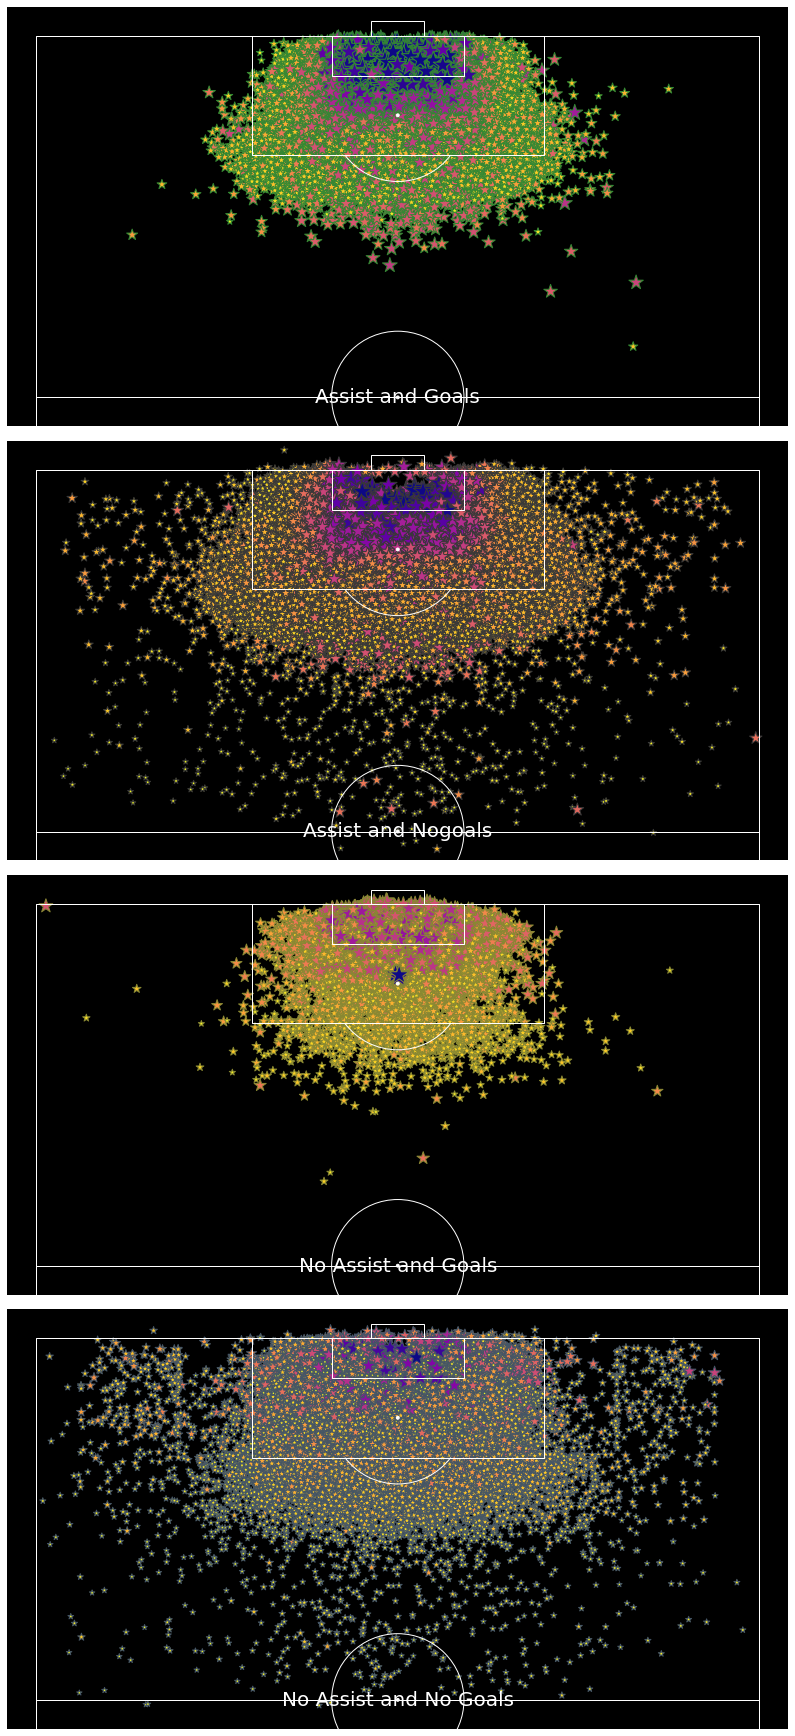

In [17]:

pitch = VerticalPitch(pitch_type='custom',
                       half=True,line_zorder=2, goal_type='box', line_color='white', pitch_color='black', linewidth=1,pitch_length=100, pitch_width=100, constrained_layout=True
                      )
fig, axs = pitch.draw(figsize=(24,24)
                      ,nrows=4, ncols=1, tight_layout=False, constrained_layout=True)


asg = pitch.scatter(assist_goals.x*100, assist_goals.y*100, s=(assist_goals.xG*400)+30
                ,cmap='plasma_r', 
                   edgecolors='#338833',  
                   c=assist_goals.xG, 
                   marker='*',
                   ax=axs[0])

asng = pitch.scatter(assist_nogoals.x*100, assist_nogoals.y*100, s=(assist_nogoals.xG*400)+30
                ,cmap='plasma_r',  
                   edgecolors='#383838',
                   marker='*',
                   c=assist_nogoals.xG,
                   ax=axs[1])
nasg = pitch.scatter(noassist_goals.x*100, noassist_goals.y*100, s=(noassist_goals.xG*400)+30
                ,cmap='plasma_r', 
                   edgecolors='#888833',  
                   c=noassist_goals.xG, 
                   marker='*',  
                   ax=axs[2])
nasng = pitch.scatter(noassist_nogoals.x*100, noassist_nogoals.y*100, s=(noassist_nogoals.xG*400)+30
                ,cmap='plasma_r', 
                   edgecolors='#445566',  
                   c=noassist_nogoals.xG, 
                   marker='*',  
                   ax=axs[3])

axs[0].text(x=50, y=50, s='Assist and Goals',
              size=20,
              color='white',
              va='center', ha='center')
axs[1].text(x=50, y=50, s='Assist and Nogoals',
              size=20,
              color='white',
              va='center', ha='center')
axs[2].text(x=50, y=50, s='No Assist and Goals',
              size=20,
              color='white',
              va='center', ha='center')
axs[3].text(x=50, y=50, s='No Assist and No Goals',
              size=20,
              color='white',
              va='center', ha='center')
